In [87]:
# Allow display of images
from IPython.display import display, Image

# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import signal 
import pandas as pd

# Tools for statistics
from scipy import stats
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import cluster
from statsmodels.formula.api import ols
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind,mannwhitneyu
import seaborn as sns


# Tools from brainsignal library
import os
import sys
path=r'C:\Users\Hamon\Documents\Stage\brainsignal'
sys.path.append(path)
import brainsignal.datageneration as dg
import brainsignal.datanalysis as da
import brainsignal.postprocessing as pp

# This makes the plots appear inside the notebook
%matplotlib inline

# Load data

### ABP data

In [88]:
rep='../output/'
patientdir='ID_1'
study_name='widow5min'
file=glob.glob(rep+patientdir+study_name+'ABP.txt', recursive=True)[0]

ABPdata=pd.read_csv(file, decimal='.', delimiter='\t')
ABPdata=ABPdata.dropna(axis='columns')

In [89]:
ABPdata

#time  Number of corrected RRi  Heart frequency (Hz)  Power hr (ms2)  \
0       180.0                      9.0                0.9833    1.798000e+09   
1       240.0                     17.0                0.9833    1.630000e+09   
2       300.0                     15.0                0.9867    1.319000e+09   
3       360.0                     17.0                0.9700    5.670000e+08   
4       420.0                      3.0                0.9600    6.933000e+07   
...       ...                      ...                   ...             ...   
1245  76440.0                     15.0                1.1230    2.196000e+09   
1246  76500.0                     11.0                1.1130    1.451000e+09   
1247  76560.0                     12.0                0.9300    2.523000e+09   
1248  76620.0                     13.0                1.1700    2.505000e+09   
1249  76680.0                     13.0                1.0670    2.591000e+09   

      Power hr integrated (ms2)  Mean ABP (mmHg)  STD ABP (mmHg)  Psys (mmHg)  \
0                   241000000.0            79.93           34.18        119.7   
1                   216600000.0            92.43           16.06        126.3   
2                   170300000.0            91.56           13.94        117.9   
3                    67350000.0            90.67           11.83        109.5   
4                     6359000.0            93.66           11.93        104.8   
...                         ...              ...             ...          ...   
1245                267200000.0            96.69           18.16        134.5   
1246                263900000.0            97.10           18.16        134.8   
1247                250600000.0            97.34           18.08        134.6   
1248                253300000.0            97.61           18.11        134.8   
1249                265500000.0            97.52           18.07        134.5   

      Pdia (mmHg)  Psys STD (mmHg)  ...  Power LF (ms2)  Power HF (ms2)  \
0           70.14           37.880  ...         10120.0         13370.0   
1           76.54           13.240  ...          9233.0         11600.0   
2           79.19           16.900  ...         17980.0         23180.0   
3           81.63           17.440  ...         22850.0         41840.0   
4           87.40           16.700  ...        123000.0        131100.0   
...           ...              ...  ...             ...             ...   
1245        78.07            6.653  ...          2667.0          9894.0   
1246        78.38            6.073  ...          2877.0         11110.0   
1247        78.13            5.600  ...          4244.0          7699.0   
1248        78.62            5.568  ...          4630.0          6373.0   
1249        78.24            5.650  ...          3027.0          5201.0   

      Power Total (ms2)   LF/HF  Peak VLF (Hz)  Peak LF (Hz)  Peak HF (Hz)  \
0               27990.0  0.7573       0.006686       0.06686        0.2173   
1               24200.0  0.7962       0.003343       0.06352        0.2173   
2               44670.0  0.7758       0.010030       0.14710        0.1906   
3               72300.0  0.5462       0.033430       0.07021        0.1772   
4              297600.0  0.9379       0.003343       0.07355        0.2675   
...                 ...     ...            ...           ...           ...   
1245            13650.0  0.2695       0.013370       0.10700        0.3076   
1246            15190.0  0.2588       0.036770       0.10360        0.1605   
1247            13290.0  0.5513       0.033430       0.13370        0.1605   
1248            13020.0  0.7265       0.033430       0.08692        0.1504   
1249             9987.0  0.5820       0.030090       0.14710        0.3811   

      Fraction LF (%)  Fraction HF (%)  time normalized  
0               43.09            56.91            11.49  
1               44.33            55.67            11.50  
2               43.69            56.31            11.51  
3   

### ICP data

In [90]:
file=glob.glob(rep+patientdir+study_name+'ICP.txt', recursive=True)[0]

ICPdata=pd.read_csv(file, decimal='.', delimiter='\t')
ICPdata=ICPdata.dropna(axis='columns')

In [91]:
ICPdata.columns

Index(['#time', 'Heart frequency (Hz)', 'Power hr (ms2)',
       'Respiratory frequency mean (Hz)', 'Respiratory frequency std (Hz)',
       'Mean ICP (mmHg)', 'STD ICP (mmHg)', 'Mean AMP (mmHg)',
       'STD AMP (mmHg)', 'Mean ICP max (mmHg)', 'STD ICP max (mmHg)',
       'Mean ICP min (mmHg)', 'STD ICP min (mmHg)', 'Slope', 'Error slope',
       'Intercept', 'rvalue', 'pvalue', 'std err', 'time normalized'],
      dtype='object')

In [92]:
ICPdata=ICPdata.rename(columns={'Heart frequency (Hz)': 'Heart frequency ICP (Hz)', 'pvalue':'pvalueAMPICP'})

# Transfer functions

In [93]:
file=glob.glob(rep+patientdir+study_name+'TFmag.txt', recursive=True)[0]

TFmagdata=pd.read_csv(file, decimal='.', delimiter='\t')
TFmagdata=TFmagdata.dropna(axis='columns')

In [94]:
TFmagdata

#time/frequency   0.195312   0.390625   0.585938   0.781250   0.976562  \
0            0.058333 -29.768160 -23.195086 -22.919814 -23.612670 -23.873900   
1            0.075000 -29.137192 -24.068698 -23.131577 -24.161889 -23.789177   
2            0.091667 -19.290273 -19.986339 -23.006853 -23.583981 -23.576148   
3            0.108333 -21.128947 -21.716585 -22.748093 -23.159944 -23.069027   
4            0.125000 -29.528694 -22.400188 -22.468167 -22.524771 -22.742233   
...               ...        ...        ...        ...        ...        ...   
1272        21.258333 -19.350531 -17.240966 -20.221022 -21.805552 -22.123894   
1273        21.275000 -18.490303 -17.854433 -20.811925 -21.980280 -22.467521   
1274        21.291667 -19.348216 -18.260464 -21.736923 -22.924477 -23.232422   
1275        21.308333 -17.721878 -18.501372 -22.043755 -22.973572 -23.454614   
1276        21.325000 -18.070590 -19.364475 -22.234960 -22.924833 -23.498704   

       1.171875   1.367188   1.562500   1.757812  ...  18.164062  18.359375  \
0    -23.965517 -25.517671 -26.796997 -27.476467  ... -44.823323 -53.973570   
1    -23.982544 -25.494592 -26.658449 -27.421815  ... -42.949924 -62.003460   
2    -23.586907 -25.075220 -26.619744 -27.079364  ... -46.104402 -55.313491   
3    -23.354006 -24.968833 -26.240505 -26.583089  ... -50.685208 -54.599970   
4    -23.127604 -24.566450 -25.854276 -26.201157  ... -54.324366 -55.681148   
...         ...        ...        ...        ...  ...        ...        ...   
1272 -22.581071 -23.210080 -24.371641 -25.936517  ... -49.053311 -42.453057   
1273 -23.002326 -23.549344 -24.479108 -25.900621  ... -40.737235 -41.784424   
1274 -23.660430 -24.132739 -25.155565 -26.441547  ... -40.291324 -41.301436   
1275 -23.851806 -24.198419 -24.992279 -26.337285  ... -38.071349 -39.322620   
1276 -23.810121 -24.129889 -25.218599 -26.348208  ... -38.064712 -36.710558   

      18.554688  18.750000  18.945312  19.140625  19.335938  19.531250  \
0    -42.570044 -39.665888 -45.726111 -54.456547 -49.069275 -42.269800   
1    -45.580981 -41.181536 -45.355141 -49.629038 -55.070546 -52.848302   
2    -51.623381 -51.077125 -48.262004 -46.451120 -53.015163 -48.591064   
3    -55.821773 -52.455928 -47.810195 -59.964868 -69.225178 -56.601703   
4    -55.264699 -49.583076 -54.009615 -60.450857 -58.701704 -67.780998   
...         ...        ...        ...        ...        ...        ...   
1272 -39.741712 -40.662525 -40.747081 -39.242285 -41.951284 -41.601717   
1273 -40.187871 -39.637328 -40.544403 -39.519693 -40.627819 -42.025859   
1274 -42.133564 -40.430933 -39.322068 -39.611366 -45.421374 -41.563849   
1275 -39.117355 -42.499955 -41.503189 -40.575528 -42.854640 -39.313309   
1276 -40.216379 -41.783016 -41.583221 -41.976175 -42.602869 -39.962143   

      19.726562  19.921875  
0    -41.158252 -52.930398  
1    -44.529894 -45.321755  
2    -49.304691 -48.985231  
3    -51.908398 -51.035003  
4    -55.918142 -51.682108  
...         ...        ...  
1272 -41.128622 -41.129690  
1273 -44.214373 -43.386310  
1274 -42.132060 -45.926826  
1275 -41.908801 -46.590895  
1276 -43.904449 -47.773227  

[1277 rows x 103 columns]

# ABP ICP

In [95]:
file=glob.glob(rep+patientdir+study_name+'ABP_ICP.txt', recursive=True)[0]

ABPICPdata=pd.read_csv(file, decimal='.', delimiter='\t')
ABPICPdata=ABPICPdata.dropna(axis='columns')

In [96]:
ABPICPdata

#time  Correlation  pvalue  CPP mean  CPP std
0       180.0      -0.4408     0.0     87.41    37.47
1       240.0       0.4757     0.0    101.30    15.39
2       300.0       0.4327     0.0    100.50    13.35
3       360.0       0.3967     0.0     99.52    11.28
4       420.0       0.2467     0.0    102.70    11.64
...       ...          ...     ...       ...      ...
1271  76440.0       0.4087     0.0     95.13    17.17
1272  76500.0       0.4337     0.0     95.23    17.16
1273  76560.0       0.4328     0.0     96.12    17.16
1274  76620.0       0.5183     0.0     96.86    17.19
1275  76680.0       0.5872     0.0     97.04    17.12

[1276 rows x 5 columns]

In [97]:
TFmagdata['#time/frequency']

0        0.058333
1        0.075000
2        0.091667
3        0.108333
4        0.125000
          ...    
1272    21.258333
1273    21.275000
1274    21.291667
1275    21.308333
1276    21.325000
Name: #time/frequency, Length: 1277, dtype: float64

### Combine databases

In [98]:
ABPdata

#time  Number of corrected RRi  Heart frequency (Hz)  Power hr (ms2)  \
0       180.0                      9.0                0.9833    1.798000e+09   
1       240.0                     17.0                0.9833    1.630000e+09   
2       300.0                     15.0                0.9867    1.319000e+09   
3       360.0                     17.0                0.9700    5.670000e+08   
4       420.0                      3.0                0.9600    6.933000e+07   
...       ...                      ...                   ...             ...   
1245  76440.0                     15.0                1.1230    2.196000e+09   
1246  76500.0                     11.0                1.1130    1.451000e+09   
1247  76560.0                     12.0                0.9300    2.523000e+09   
1248  76620.0                     13.0                1.1700    2.505000e+09   
1249  76680.0                     13.0                1.0670    2.591000e+09   

      Power hr integrated (ms2)  Mean ABP (mmHg)  STD ABP (mmHg)  Psys (mmHg)  \
0                   241000000.0            79.93           34.18        119.7   
1                   216600000.0            92.43           16.06        126.3   
2                   170300000.0            91.56           13.94        117.9   
3                    67350000.0            90.67           11.83        109.5   
4                     6359000.0            93.66           11.93        104.8   
...                         ...              ...             ...          ...   
1245                267200000.0            96.69           18.16        134.5   
1246                263900000.0            97.10           18.16        134.8   
1247                250600000.0            97.34           18.08        134.6   
1248                253300000.0            97.61           18.11        134.8   
1249                265500000.0            97.52           18.07        134.5   

      Pdia (mmHg)  Psys STD (mmHg)  ...  Power LF (ms2)  Power HF (ms2)  \
0           70.14           37.880  ...         10120.0         13370.0   
1           76.54           13.240  ...          9233.0         11600.0   
2           79.19           16.900  ...         17980.0         23180.0   
3           81.63           17.440  ...         22850.0         41840.0   
4           87.40           16.700  ...        123000.0        131100.0   
...           ...              ...  ...             ...             ...   
1245        78.07            6.653  ...          2667.0          9894.0   
1246        78.38            6.073  ...          2877.0         11110.0   
1247        78.13            5.600  ...          4244.0          7699.0   
1248        78.62            5.568  ...          4630.0          6373.0   
1249        78.24            5.650  ...          3027.0          5201.0   

      Power Total (ms2)   LF/HF  Peak VLF (Hz)  Peak LF (Hz)  Peak HF (Hz)  \
0               27990.0  0.7573       0.006686       0.06686        0.2173   
1               24200.0  0.7962       0.003343       0.06352        0.2173   
2               44670.0  0.7758       0.010030       0.14710        0.1906   
3               72300.0  0.5462       0.033430       0.07021        0.1772   
4              297600.0  0.9379       0.003343       0.07355        0.2675   
...                 ...     ...            ...           ...           ...   
1245            13650.0  0.2695       0.013370       0.10700        0.3076   
1246            15190.0  0.2588       0.036770       0.10360        0.1605   
1247            13290.0  0.5513       0.033430       0.13370        0.1605   
1248            13020.0  0.7265       0.033430       0.08692        0.1504   
1249             9987.0  0.5820       0.030090       0.14710        0.3811   

      Fraction LF (%)  Fraction HF (%)  time normalized  
0               43.09            56.91            11.49  
1               44.33            55.67            11.50  
2               43.69            56.31            11.51  
3   

In [99]:
TFmagdata['#time']=round(TFmagdata['#time/frequency']*60*60)-30

### Here it would be nice to have the same times directly in the output file

In [100]:
ABPICPdata

#time  Correlation  pvalue  CPP mean  CPP std
0       180.0      -0.4408     0.0     87.41    37.47
1       240.0       0.4757     0.0    101.30    15.39
2       300.0       0.4327     0.0    100.50    13.35
3       360.0       0.3967     0.0     99.52    11.28
4       420.0       0.2467     0.0    102.70    11.64
...       ...          ...     ...       ...      ...
1271  76440.0       0.4087     0.0     95.13    17.17
1272  76500.0       0.4337     0.0     95.23    17.16
1273  76560.0       0.4328     0.0     96.12    17.16
1274  76620.0       0.5183     0.0     96.86    17.19
1275  76680.0       0.5872     0.0     97.04    17.12

[1276 rows x 5 columns]

In [101]:
tini=max((ICPdata['#time'][0],ABPdata['#time'][0],TFmagdata['#time'][0]))

tend=min((max(ICPdata['#time']),max(ABPdata['#time']),max(TFmagdata['#time'])))


In [102]:
data=ICPdata.merge(ABPdata,on='#time')
data=data.merge(ABPICPdata,on='#time')
data=data.merge(TFmagdata,on='#time')

In [103]:
data

#time  Heart frequency ICP (Hz)  Power hr (ms2)_x  \
0       180.0                  0.983317        10310000.0   
1       240.0                  0.983317         9580000.0   
2       300.0                  0.953317         9579000.0   
3       360.0                  0.943318        12730000.0   
4       420.0                  0.943318        10870000.0   
...       ...                       ...               ...   
1245  76440.0                  1.123315        15700000.0   
1246  76500.0                  1.113315         9040000.0   
1247  76560.0                  0.929984        11830000.0   
1248  76620.0                  0.933318         9590000.0   
1249  76680.0                  1.066649         9759000.0   

      Respiratory frequency mean (Hz)  Respiratory frequency std (Hz)  \
0                            0.241265                        0.044802   
1                            0.278702                        0.037897   
2                            0.220466                        0.024609   
3                            0.228785                        0.007205   
4                            0.257903                        0.038125   
...                               ...                             ...   
1245                         0.253744                        0.029706   
1246                         0.295341                        0.096574   
1247                         0.232945                        0.067588   
1248                         0.195507                        0.024609   
1249                         0.278702                        0.068981   

      Mean ICP (mmHg)  STD ICP (mmHg)  Mean AMP (mmHg)  STD AMP (mmHg)  \
0             -7.4790           6.446            3.213          0.4139   
1             -8.8740           1.543            3.258          0.3828   
2             -8.9210           1.516            3.240          0.3601   
3             -8.8560           1.638            3.199          0.3941   
4             -8.9950           1.572            3.129          0.3566   
...               ...             ...              ...             ...   
1245           1.5590           2.923            3.891          0.7175   
1246           1.8730           2.694            3.950          0.7083   
1247           1.2220           2.470            3.796          0.6857   
1248           0.7516           1.922            3.603          0.5506   
1249           0.4816           1.727            3.522          0.5056   

      Mean ICP max (mmHg)  ...  18.164062  18.359375  18.554688  18.750000  \
0                  -5.984  ... -44.823323 -53.973570 -42.570044 -39.665888   
1                  -7.022  ... -42.949924 -62.003460 -45.580981 -41.181536   
2                  -7.091  ... -46.104402 -55.313491 -51.623381 -51.077125   
3                  -7.060  ... -50.685208 -54.599970 -55.821773 -52.455928   
4                  -7.245  ... -54.324366 -55.681148 -55.264699 -49.583076   
...                   ...  ...        ...        ...        ...        ...   
1245                3.704  ... -43.424891 -42.836841 -41.357059 -38.913503   
1246                4.059  ... -49.053311 -42.453057 -39.741712 -40.662525   
1247                3.293  ... -40.737235 -41.784424 -40.187871 -39.637328   
1248                2.698  ... -40.291324 -41.301436 -42.133564 -40.430933   
1249                2.431  ... -38.071349 -39.322620 -39.117355 -42.499955   

      18.945312  19.140625  19.335938  19.531250  19.726562  19.921875  
0    -45.726111 -54.456547 -49.069275 -42.269800 -41.158252 -52.930398  
1    -45.355141 -49.629038 -55.070546 -52.848302 -44.529894 -45.321755  
2    -48.262004 -46.451120 -53.015163 -48.591064 -49.304691 -48.985231  
3    -47.810195 -59.964868 -69.225178 -56.601703 -51.908398 -51.035003  
4    -54.009615 -60.450857 -58.701704 -67.780998 -55.918142 -51.682108  
...         ...        ...        ...        ...        ...        ...  
1245 -42.184262 -39.568858 -36.164300 -38.307905 -38.467751 -

# Data filtering

In [104]:
data['errABPABP']=np.abs(data['Heart frequency (Hz)']-(1/(data['Mean RR (ms)']*1e-3)))/data['Heart frequency (Hz)']*100

In [105]:
data['errABPICP']=np.abs(data['Heart frequency ICP (Hz)']-data['Heart frequency (Hz)'])/data['Heart frequency ICP (Hz)']*100

### filtering on discrepency between Heart rate measurments

<AxesSubplot:>

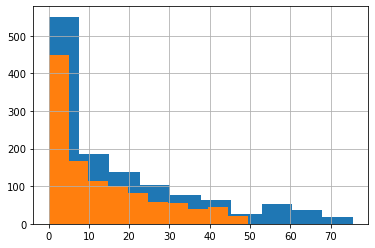

In [110]:
Igood=data['errABPABP']<=50
(abs(data['errABPABP'])).hist()
(abs(data['errABPABP']))[Igood].hist()

<AxesSubplot:>

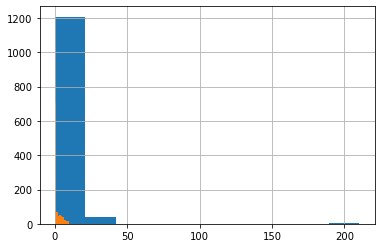

In [111]:
Igood=Igood&(data['errABPICP']<=10)
(abs(data['errABPICP'])).hist()
(abs(data['errABPICP']))[Igood].hist()

In [112]:
#Igood=Igood&(ABPdata['STD RR (ms)']<120)

#ABPdata['STD RR (ms)'].hist()
#ABPdata['STD RR (ms)'][Igood].hist()

### filtering on difference between mean ABP pressures and extrema

<AxesSubplot:>

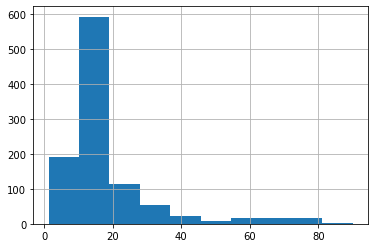

In [113]:
#Igood=Igood&(abs(ABPdata['Pdia (mmHg)']-ABPdata['Pdia max (mmHg)'])<50)
#Igood=Igood&(abs(ABPdata['Pdia (mmHg)']-ABPdata['Pdia min (mmHg)'])<50)


(abs(data['Pdia (mmHg)']-data['Pdia min (mmHg)']))[Igood].hist()

<AxesSubplot:>

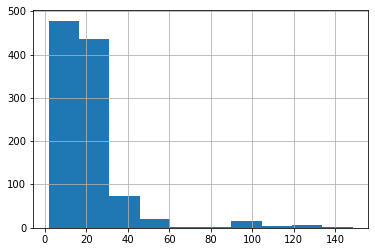

In [114]:
#Igood=Igood&(abs(ABPdata['Psys (mmHg)']-ABPdata['Psys max (mmHg)'])<80)
#Igood=Igood&(abs(ABPdata['Psys (mmHg)']-ABPdata['Psys min (mmHg)'])<80)

(abs(data['Psys (mmHg)']-data['Psys min (mmHg)']))[Igood].hist()

<AxesSubplot:>

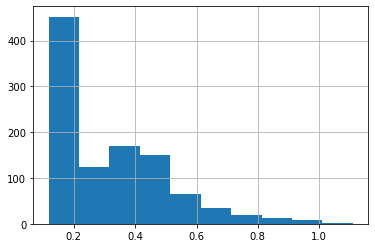

In [117]:
(data['STD RR (ms)']/data['Mean RR (ms)'][Igood])[Igood].hist()

In [118]:
data=data.dropna()
data=data[Igood]

# Correlations analysis

### ABP ICP correlation

Concept and definition of the pressure reactivity index (PRx).

A: In patients with impaired cerebral autoregulation, a vicious cycle occurs (upper left), and the correlation coefficient (PRx) between MAP and ICP is positively increased (lower). 
    
B: In patients with preserved cerebral autoregulation, a positive cycle is formed by cerebral autoregulation (upper), and the PRx decreases and sometimes becomes negative (lower) (This is modified from reference 10). CBV, cerebral blood volume; MAP, mean arterial pressure; CPP, cerebral perfusion pressure; ICP, intracranial pressure.

[Cho et al.,  J Neurointensive Care, 2018, doi: 10.32587/jnic.2018.00038]

![MAP-ICP](../notebooks/images/MAP-ICP.jpg)

Text(0.5, 1.0, 'ICP (mmHg)')

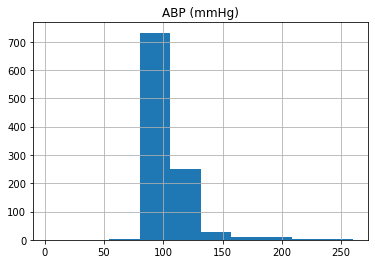

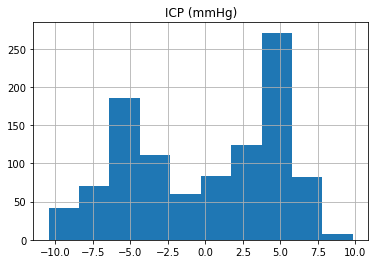

In [119]:
(data['Mean ABP (mmHg)'][Igood]).hist()
plt.title('ABP (mmHg)')

plt.figure()
(data['Mean ICP (mmHg)'][Igood]).hist()
plt.title('ICP (mmHg)')


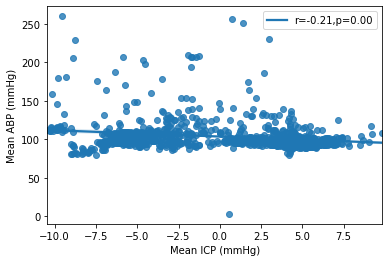

In [120]:
varx='Mean ICP (mmHg)'
vary='Mean ABP (mmHg)'

#remove the outliers in ICP
#filter=data['Mean ICP (mmHg)']<=15
dataplot=data#[filter]


x=dataplot[varx]
y=dataplot[vary]
nas = np.logical_or(pd.isnull(x), pd.isnull(y))
r, p = stats.pearsonr(x[~nas], y[~nas]) #pearsonr
l1='r=%.2f,p=%.2f'%(r,p)


fig, ax = plt.subplots()
g=sns.regplot(data=dataplot,x=varx,y=vary,ax=ax)
L=[l1]
plt.legend(L)

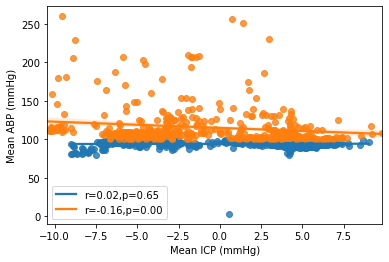

In [121]:
varx='Mean ICP (mmHg)'
vary='Mean ABP (mmHg)'

#remove the outliers in ICP
filter=data['Mean ICP (mmHg)']<=15


#separate in two groups for ABP dia , threasold = 75 mmHg

# group 1 
filter1=filter&(data['Mean ABP (mmHg)']<=100)

dataplot=data[filter1]

x=dataplot[varx]
y=dataplot[vary]
nas = np.logical_or(pd.isnull(x), pd.isnull(y))
r, p = stats.pearsonr(x[~nas], y[~nas])

l1='r=%.2f,p=%.2f'%(r,p)

fig, ax = plt.subplots()
g=sns.regplot(data=dataplot,x=varx,y=vary,ax=ax)

# group 2
filter2=filter&(data['Mean ABP (mmHg)']>100)

dataplot=data[filter2]


x=dataplot[varx]
y=dataplot[vary]
nas = np.logical_or(pd.isnull(x), pd.isnull(y))
r, p = stats.pearsonr(x[~nas], y[~nas])

l2='r=%.2f,p=%.2f'%(r,p)

g=sns.regplot(data=dataplot,x=varx,y=vary,ax=ax)


L=[l1, l2]
plt.legend(L)

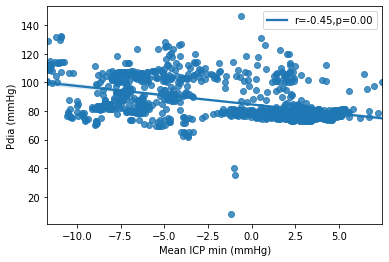

In [122]:
varx='Mean ICP min (mmHg)'
vary='Pdia (mmHg)'

#remove the outliers in ICP
#filter=data['Mean ICP (mmHg)']<=15
dataplot=data#[filter]


x=dataplot[varx]
y=dataplot[vary]
nas = np.logical_or(pd.isnull(x), pd.isnull(y))
r, p = stats.pearsonr(x[~nas], y[~nas]) #pearsonr
l1='r=%.2f,p=%.2f'%(r,p)


fig, ax = plt.subplots()
g=sns.regplot(data=dataplot,x=varx,y=vary,ax=ax)
L=[l1]
plt.legend(L)

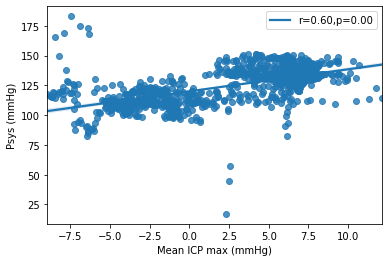

In [123]:
varx='Mean ICP max (mmHg)'
vary='Psys (mmHg)'

#remove the outliers in ICP
#filter=data['Mean ICP (mmHg)']<=15
dataplot=data#[filter]


x=dataplot[varx]
y=dataplot[vary]
nas = np.logical_or(pd.isnull(x), pd.isnull(y))
r, p = stats.pearsonr(x[~nas], y[~nas]) #pearsonr
l1='r=%.2f,p=%.2f'%(r,p)


fig, ax = plt.subplots()
g=sns.regplot(data=dataplot,x=varx,y=vary,ax=ax)
L=[l1]
plt.legend(L)

### PRx at 5 minutes time scale

<AxesSubplot:>

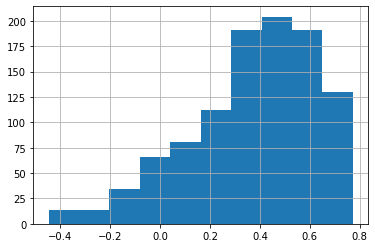

In [124]:
data['Correlation'].hist()

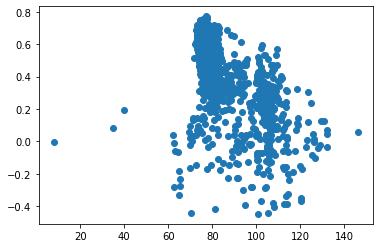

In [125]:
plt.scatter(data['Pdia (mmHg)'],data['Correlation'])

Todo : check the definition of PRx. Maybe we need to average the pressure ? I an surprised it is always positive where there were twi trends in the mean ICP mean ABP correlations 

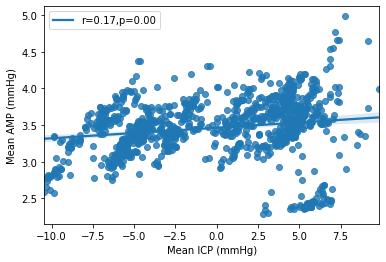

In [126]:
varx='Mean ICP (mmHg)'
vary='Mean AMP (mmHg)'

#remove the outliers in ICP
filter=data['Mean ICP (mmHg)']<=15
dataplot=data[filter]


x=dataplot[varx]
y=dataplot[vary]
nas = np.logical_or(pd.isnull(x), pd.isnull(y))
r, p = stats.pearsonr(x[~nas], y[~nas]) #pearsonr
l1='r=%.2f,p=%.2f'%(r,p)


fig, ax = plt.subplots()
g=sns.regplot(data=dataplot,x=varx,y=vary,ax=ax)
L=[l1]
plt.legend(L)

It seems that higher is p0 higher is the slope. Why ? Try to understant this with Ursino.

In [127]:
data['p0']=-data['Intercept']/data['Slope']
data['invp0']=-data['Slope']/data['Intercept']

<AxesSubplot:>

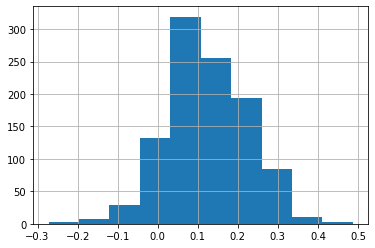

In [128]:
data['Slope'].hist()

We can see that the slope can be 0 : there are times where amp ICP and ICP seems not correlated --> need to perfom the analysis on a shorted time window. 
    
I will filter with the p-value

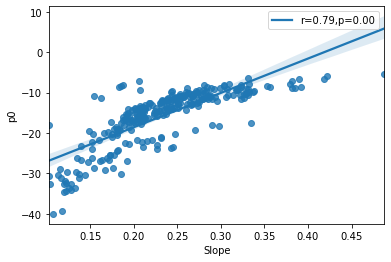

In [129]:
varx='Slope'
vary='p0'

#remove the outliers in ICP
filter=(data['pvalueAMPICP']<=0.05)&(data['Slope']>=0.1)
dataplot=data[filter]


x=dataplot[varx]
y=dataplot[vary]
nas = np.logical_or(pd.isnull(x), pd.isnull(y))
r, p = stats.pearsonr(x[~nas], y[~nas]) #pearsonr
l1='r=%.2f,p=%.2f'%(r,p)


fig, ax = plt.subplots()
g=sns.regplot(data=dataplot,x=varx,y=vary,ax=ax)
L=[l1]
plt.legend(L)

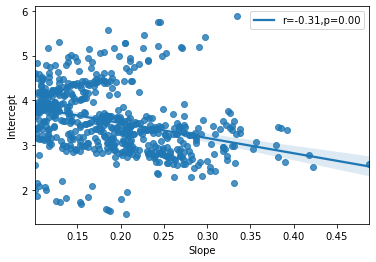

In [130]:
varx='Slope'
vary='Intercept'

#remove the outliers in ICP
filter=(data['pvalue']<=0.05)&(data['Slope']>=0.1)
dataplot=data[filter]


x=dataplot[varx]
y=dataplot[vary]
nas = np.logical_or(pd.isnull(x), pd.isnull(y))
r, p = stats.pearsonr(x[~nas], y[~nas]) #pearsonr
l1='r=%.2f,p=%.2f'%(r,p)


fig, ax = plt.subplots()
g=sns.regplot(data=dataplot,x=varx,y=vary,ax=ax)
L=[l1]
plt.legend(L)

### Blood flow and perfusion pressure

I should check the definition of perfusion pressure.

When ABP - ICP is reduced the intracranial blood flow is reduced whereas the resistance is also reduced by vessels dilaiton. --> but then ICP is increased and the difference is evenmore reduced.

If we have an increase in the slope, probably delta V is higher --> the young modulus of arteries as the muscles are less contracted --> the active part is important in the slope and following the slope can give an indication of the contraction / dilation of active walls in the brain.

But then why isnt this visible during the infusion test ? As the ICP increases we are reducing CPP and the vessel should dilate. 

The other eplaination for an increased slope is a less compliant CNS. If the pressure in the veins is increased then the compliance from the equeching of the veins is reduced. Then ICP is increased which is compatible with the reduced CPP. Does a lower slope means and increased veinous pressure ?

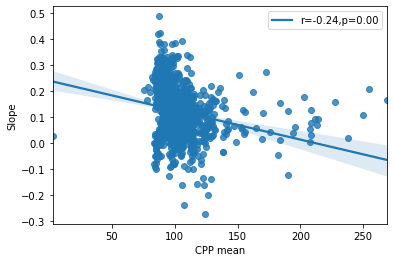

In [131]:
vary='Slope'
varx='CPP mean'

#remove the outliers in ICP
filter=data['Mean ICP (mmHg)']<=15

dataplot=data[filter]

x=dataplot[varx]
y=dataplot[vary]
nas = np.logical_or(pd.isnull(x), pd.isnull(y))
r, p = stats.pearsonr(x[~nas], y[~nas]) #pearsonr
l1='r=%.2f,p=%.2f'%(r,p)

fig, ax = plt.subplots()
g=sns.regplot(data=dataplot,x=varx,y=vary,ax=ax)
L=[l1]
plt.legend(L)

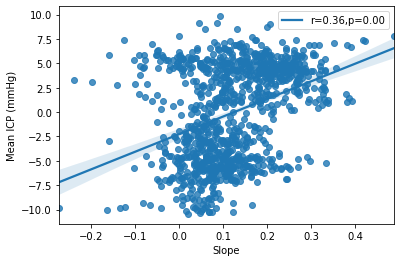

In [132]:
varx='Slope'
vary='Mean ICP (mmHg)'

#remove the outliers in ICP
filter=data['Mean ICP (mmHg)']<=15
dataplot=data[filter]


x=dataplot[varx]
y=dataplot[vary]
nas = np.logical_or(pd.isnull(x), pd.isnull(y))
r, p = stats.pearsonr(x[~nas], y[~nas]) #pearsonr
l1='r=%.2f,p=%.2f'%(r,p)


fig, ax = plt.subplots()
g=sns.regplot(data=dataplot,x=varx,y=vary,ax=ax)
L=[l1]
plt.legend(L)

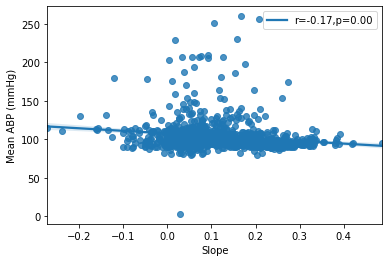

In [133]:
varx='Slope'
vary='Mean ABP (mmHg)'

#remove the outliers in ICP
filter=data['Mean ICP (mmHg)']<=15
dataplot=data[filter]


x=dataplot[varx]
y=dataplot[vary]
nas = np.logical_or(pd.isnull(x), pd.isnull(y))
r, p = stats.pearsonr(x[~nas], y[~nas]) #pearsonr
l1='r=%.2f,p=%.2f'%(r,p)


fig, ax = plt.subplots()
g=sns.regplot(data=dataplot,x=varx,y=vary,ax=ax)
L=[l1]
plt.legend(L)

### ABP and autonomous system

Mean RR is lower for higher P sys. --> heart rate increase with decreased arterial pressure = baroreflex

It seems to be 2 (3) clusters

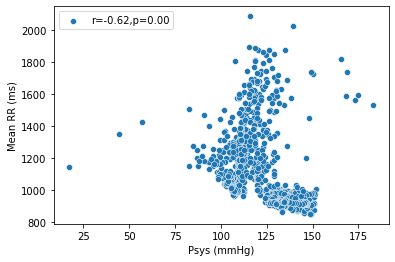

In [134]:
vary='Mean RR (ms)'
varx='Psys (mmHg)'


dataplot=data #[filter]

x=dataplot[varx]
y=dataplot[vary]
nas = np.logical_or(pd.isnull(x), pd.isnull(y))
r, p = stats.spearmanr(x[~nas], y[~nas]) #pearsonr
l1='r=%.2f,p=%.2f'%(r,p)

fig, ax = plt.subplots()
g=sns.scatterplot(data=dataplot,x=varx,y=vary,ax=ax)
L=[l1]
plt.legend(L)

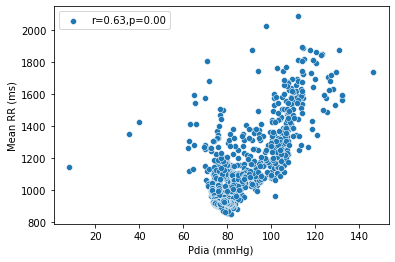

In [135]:
vary='Mean RR (ms)'
varx='Pdia (mmHg)'


dataplot=data #[filter]

x=dataplot[varx]
y=dataplot[vary]
nas = np.logical_or(pd.isnull(x), pd.isnull(y))
r, p = stats.spearmanr(x[~nas], y[~nas]) #pearsonr
l1='r=%.2f,p=%.2f'%(r,p)


fig, ax = plt.subplots()
g=sns.scatterplot(data=dataplot,x=varx,y=vary,ax=ax)
L=[l1]
plt.legend(L)

### ICP and autonomous system

In [136]:
ABPdata.columns

Index(['#time', 'Number of corrected RRi', 'Heart frequency (Hz)',
       'Power hr (ms2)', 'Power hr integrated (ms2)', 'Mean ABP (mmHg)',
       'STD ABP (mmHg)', 'Psys (mmHg)', 'Pdia (mmHg)', 'Psys STD (mmHg)',
       'Pdia STD (mmHg)', 'Psys max (mmHg)', 'Pdia max (mmHg)',
       'Psys min (mmHg)', 'Pdia min (mmHg)', 'Psys outliers', 'Pdia outliers',
       'Mean RR (ms)', 'STD RR (ms)', 'Min RR (ms)', 'Max RR (ms)',
       'RMSSD (ms)', 'NNxx', 'pNNxx (%)', 'CVSD', 'range_nni (ms)',
       'Sample entropy', 'Power VLF (ms2)', 'Power LF (ms2)', 'Power HF (ms2)',
       'Power Total (ms2)', 'LF/HF', 'Peak VLF (Hz)', 'Peak LF (Hz)',
       'Peak HF (Hz)', 'Fraction LF (%)', 'Fraction HF (%)',
       'time normalized'],
      dtype='object')

In [137]:
ICPdata.columns

Index(['#time', 'Heart frequency ICP (Hz)', 'Power hr (ms2)',
       'Respiratory frequency mean (Hz)', 'Respiratory frequency std (Hz)',
       'Mean ICP (mmHg)', 'STD ICP (mmHg)', 'Mean AMP (mmHg)',
       'STD AMP (mmHg)', 'Mean ICP max (mmHg)', 'STD ICP max (mmHg)',
       'Mean ICP min (mmHg)', 'STD ICP min (mmHg)', 'Slope', 'Error slope',
       'Intercept', 'rvalue', 'pvalueAMPICP', 'std err', 'time normalized'],
      dtype='object')

In [138]:
data['Power VLF log']=np.log(data['Power VLF (ms2)'])
data['Power LF log']=np.log(data['Power LF (ms2)'])
data['Power HF log']=np.log(data['Power HF (ms2)'])

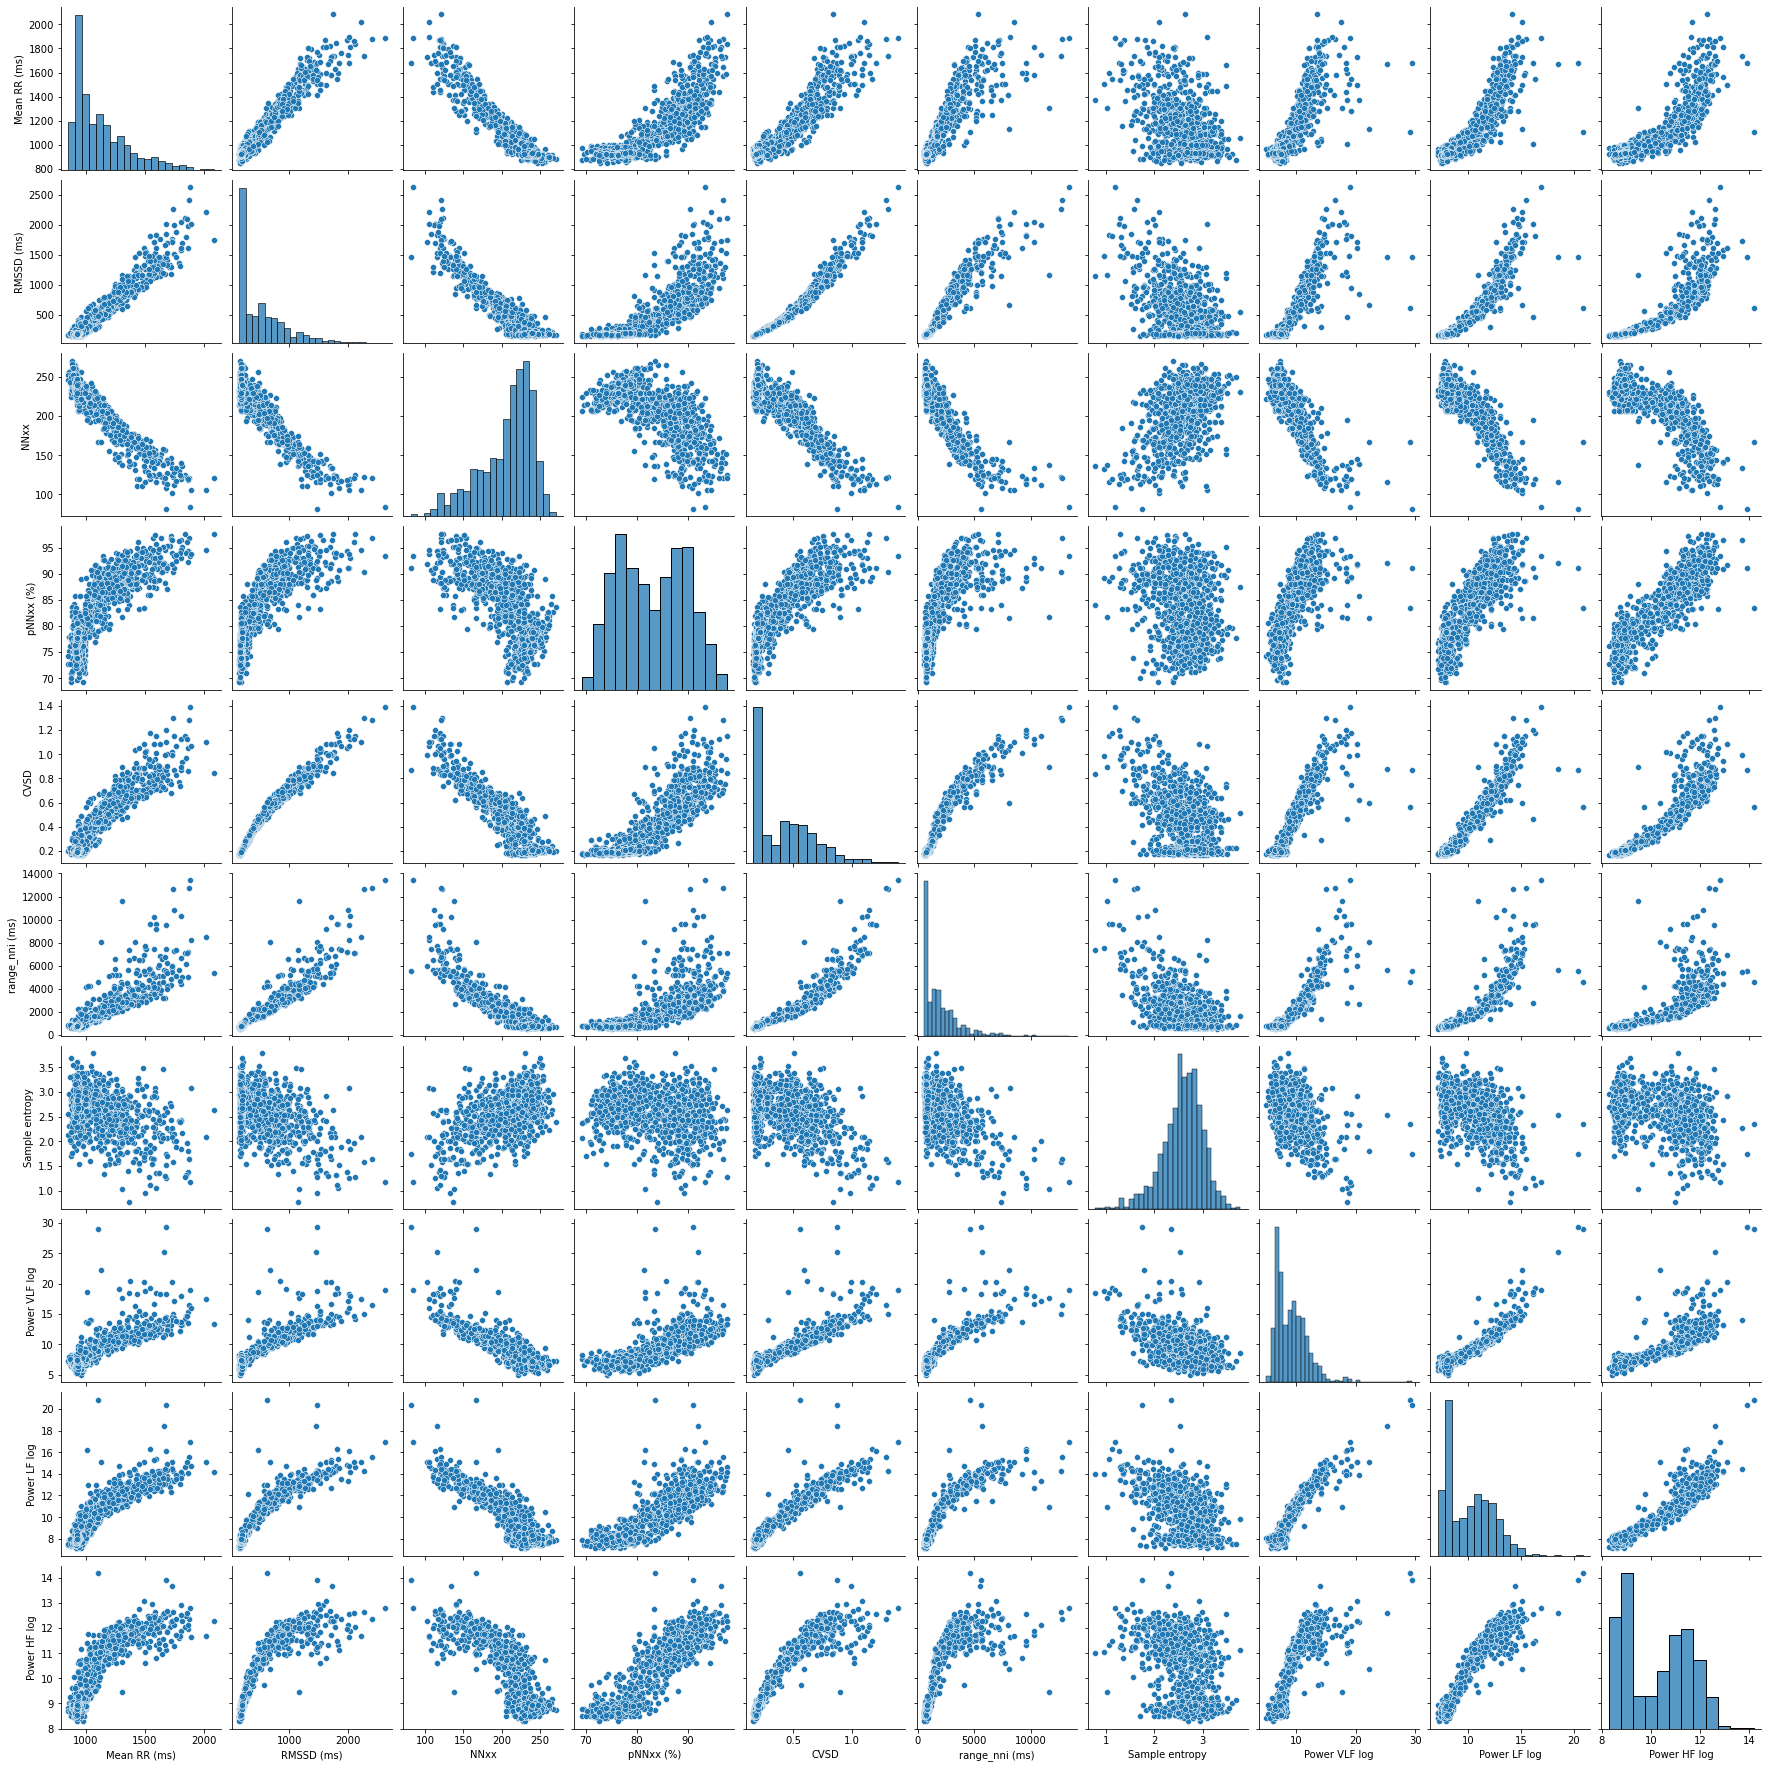

In [139]:
sns.pairplot(data[['Mean RR (ms)', 'RMSSD (ms)', 'NNxx',
       'pNNxx (%)', 'CVSD', 'range_nni (ms)', 'Sample entropy',
       'Power VLF log', 'Power LF log', 'Power HF log']])

<AxesSubplot:>

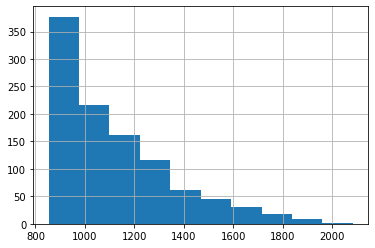

In [140]:
data['Mean RR (ms)'].hist()

In [141]:
data['Power HF log shift']=np.nan
ishift=0

for i in range(0,len(data['Power HF log shift'])-ishift) :
    data['Power HF log shift'].iloc[i]=data['Power HF log'].iloc[i+ishift]

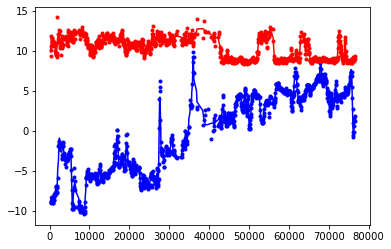

In [142]:
I=(data['#time']>tini)&(data['#time']<tend)

var1='Mean ICP (mmHg)'
var2= 'Power HF log shift'

meanAMP_smooth=signal.savgol_filter(data[var1],window_length=19, polyorder=4)
HF_smooth=signal.savgol_filter(data[var2],window_length=19, polyorder=4)

plt.plot(data['#time'][I],data[var1][I],'b.')
plt.plot(data['#time'][I],meanAMP_smooth[I],'b-')

plt.plot(data['#time'][I],data[var2][I],'r.')
plt.plot(data['#time'][I],HF_smooth[I],'r-')

<AxesSubplot:xlabel='Mean ICP (mmHg)', ylabel='Power HF log shift'>

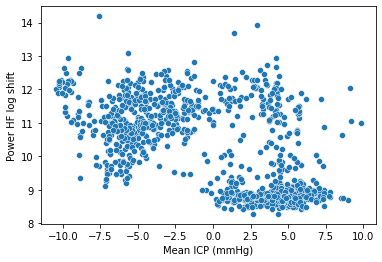

In [143]:
sns.scatterplot(data=data[I],x=var1,y=var2)

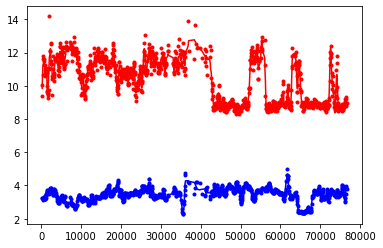

In [144]:
I=(data['#time']>tini)&(data['#time']<tend)

var1='Mean AMP (mmHg)'
var2= 'Power HF log shift'

meanAMP_smooth=signal.savgol_filter(data[var1],window_length=19, polyorder=4)
HF_smooth=signal.savgol_filter(data[var2],window_length=19, polyorder=4)

plt.plot(data['#time'][I],data[var1][I],'b.')
plt.plot(data['#time'][I],meanAMP_smooth[I],'b-')

plt.plot(data['#time'][I],data[var2][I],'r.')
plt.plot(data['#time'][I],HF_smooth[I],'r-')

<AxesSubplot:xlabel='Mean AMP (mmHg)', ylabel='Power HF log shift'>

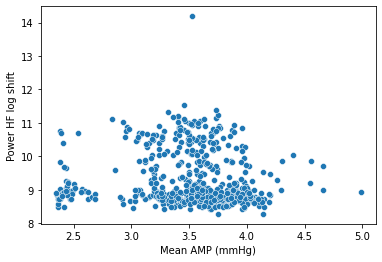

In [53]:
sns.scatterplot(data=data[I],x=var1,y=var2)

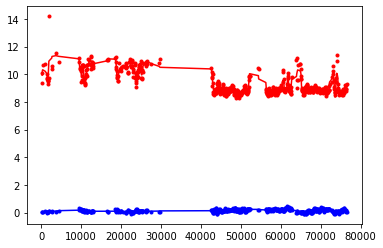

In [54]:
I=(data['#time']>tini)&(data['#time']<tend)

var1='Slope'
var2= 'Power HF log shift'

meanAMP_smooth=signal.savgol_filter(data[var1],window_length=19, polyorder=4)
HF_smooth=signal.savgol_filter(data[var2],window_length=19, polyorder=4)

plt.plot(data['#time'][I],data[var1][I],'b.')
plt.plot(data['#time'][I],meanAMP_smooth[I],'b-')

plt.plot(data['#time'][I],data[var2][I],'r.')
plt.plot(data['#time'][I],HF_smooth[I],'r-')

<AxesSubplot:xlabel='Slope', ylabel='Power HF log shift'>

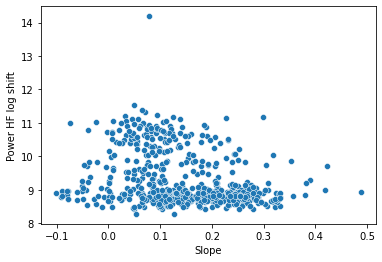

In [55]:
sns.scatterplot(data=data[I],x=var1,y=var2)

# Clustering

In [56]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [57]:
ABPdata.columns

Index(['#time', 'Number of corrected RRi', 'Heart frequency (Hz)',
       'Power hr (ms2)', 'Power hr integrated (ms2)', 'Mean ABP (mmHg)',
       'STD ABP (mmHg)', 'Psys (mmHg)', 'Pdia (mmHg)', 'Psys STD (mmHg)',
       'Pdia STD (mmHg)', 'Psys max (mmHg)', 'Pdia max (mmHg)',
       'Psys min (mmHg)', 'Pdia min (mmHg)', 'Psys outliers', 'Pdia outliers',
       'Mean RR (ms)', 'STD RR (ms)', 'Min RR (ms)', 'Max RR (ms)',
       'RMSSD (ms)', 'NNxx', 'pNNxx (%)', 'CVSD', 'range_nni (ms)',
       'Sample entropy', 'Power VLF (ms2)', 'Power LF (ms2)', 'Power HF (ms2)',
       'Power Total (ms2)', 'LF/HF', 'Peak VLF (Hz)', 'Peak LF (Hz)',
       'Peak HF (Hz)', 'Fraction LF (%)', 'Fraction HF (%)',
       'time normalized'],
      dtype='object')

In [58]:
variables=['STD RR (ms)','RMSSD (ms)', 'NNxx',
       'pNNxx (%)', 'CVSD', 'range_nni (ms)',  'Power VLF log', 'Power LF log', 'Power HF log','LF/HF']

variables=['STD RR (ms)','RMSSD (ms)', 'pNNxx (%)', 'CVSD', 'range_nni (ms)',  'Power VLF log', 'Power LF log', 'Power HF log','LF/HF','Mean RR (ms)','Psys (mmHg)', 'Pdia (mmHg)', 'Psys STD (mmHg)', 'Pdia STD (mmHg)','Respiratory frequency mean (Hz)','Respiratory frequency std (Hz)']

In [59]:
reduced_data=data[variables]
#reduced_data=reduced_data.dropna()

reduced_data =reduced_data.values


### Normalisation

In [60]:
reduced_data = scaler.fit_transform(reduced_data)

### PCA

In [61]:
clf=PCA(n_components=2)
reduced_data = clf.fit_transform((reduced_data))
exp_va=sum(clf.explained_variance_ratio_)

print('Explained variance with PC :', exp_va)

Explained variance with PC : 0.7283944208410396


[Text(0, 0.375, 'STD RR (ms)'),
 Text(0, 1.375, 'RMSSD (ms)'),
 Text(0, 2.375, 'pNNxx (%)'),
 Text(0, 3.375, 'CVSD'),
 Text(0, 4.375, 'range_nni (ms)'),
 Text(0, 5.375, 'Power VLF log'),
 Text(0, 6.375, 'Power LF log'),
 Text(0, 7.375, 'Power HF log'),
 Text(0, 8.375, 'LF/HF'),
 Text(0, 9.375, 'Mean RR (ms)'),
 Text(0, 10.375, 'Psys (mmHg)'),
 Text(0, 11.375, 'Pdia (mmHg)'),
 Text(0, 12.375, 'Psys STD (mmHg)'),
 Text(0, 13.375, 'Pdia STD (mmHg)'),
 Text(0, 14.375, 'Respiratory frequency mean (Hz)'),
 Text(0, 15.375, 'Respiratory frequency std (Hz)')]

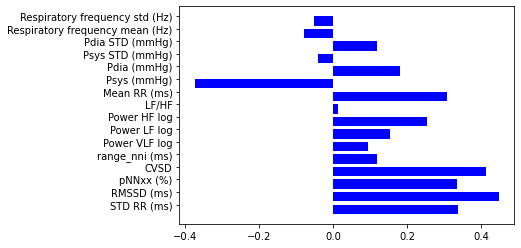

In [62]:
fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(variables))  # the x locations for the groups
ax.barh(ind, (clf.components_[0]), width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(variables, minor=False)

[Text(0, 0.375, 'STD RR (ms)'),
 Text(0, 1.375, 'RMSSD (ms)'),
 Text(0, 2.375, 'pNNxx (%)'),
 Text(0, 3.375, 'CVSD'),
 Text(0, 4.375, 'range_nni (ms)'),
 Text(0, 5.375, 'Power VLF log'),
 Text(0, 6.375, 'Power LF log'),
 Text(0, 7.375, 'Power HF log'),
 Text(0, 8.375, 'LF/HF'),
 Text(0, 9.375, 'Mean RR (ms)'),
 Text(0, 10.375, 'Psys (mmHg)'),
 Text(0, 11.375, 'Pdia (mmHg)'),
 Text(0, 12.375, 'Psys STD (mmHg)'),
 Text(0, 13.375, 'Pdia STD (mmHg)'),
 Text(0, 14.375, 'Respiratory frequency mean (Hz)'),
 Text(0, 15.375, 'Respiratory frequency std (Hz)')]

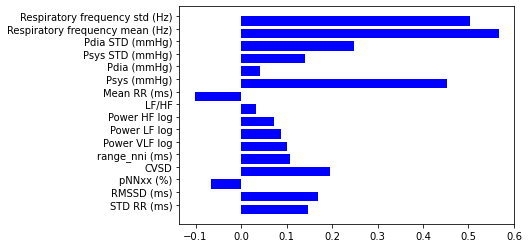

In [63]:
fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(variables))  # the x locations for the groups
ax.barh(ind, (clf.components_[1]), width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(variables, minor=False)

In [64]:
data['PCA1'] = scaler.fit_transform(reduced_data[:,0].reshape(-1, 1))
data['PCA2'] = scaler.fit_transform(reduced_data[:,1].reshape(-1, 1))

### Manual second component (if wanted)

In [65]:
ICPdata.columns

Index(['#time', 'Heart frequency ICP (Hz)', 'Power hr (ms2)',
       'Respiratory frequency mean (Hz)', 'Respiratory frequency std (Hz)',
       'Mean ICP (mmHg)', 'STD ICP (mmHg)', 'Mean AMP (mmHg)',
       'STD AMP (mmHg)', 'Mean ICP max (mmHg)', 'STD ICP max (mmHg)',
       'Mean ICP min (mmHg)', 'STD ICP min (mmHg)', 'Slope', 'Error slope',
       'Intercept', 'rvalue', 'pvalueAMPICP', 'std err', 'time normalized'],
      dtype='object')

In [66]:
variables=['Mean RR (ms)','Psys (mmHg)', 'Pdia (mmHg)', 'Psys STD (mmHg)', 'Pdia STD (mmHg)','Respiratory frequency mean (Hz)','Respiratory frequency std (Hz)']

In [67]:
reduced_data=data[variables]
#reduced_data=reduced_data.dropna()

reduced_data =reduced_data.values


### Normalisation

In [68]:
reduced_data = scaler.fit_transform(reduced_data)

### PCA

In [69]:
clf=PCA(n_components=1)
reduced_data = clf.fit_transform((reduced_data))
exp_va=sum(clf.explained_variance_ratio_)

print('Explained variance with PC :', exp_va)

Explained variance with PC : 0.4635844857685837


[Text(0, 0.375, 'Mean RR (ms)'),
 Text(0, 1.375, 'Psys (mmHg)'),
 Text(0, 2.375, 'Pdia (mmHg)'),
 Text(0, 3.375, 'Psys STD (mmHg)'),
 Text(0, 4.375, 'Pdia STD (mmHg)'),
 Text(0, 5.375, 'Respiratory frequency mean (Hz)'),
 Text(0, 6.375, 'Respiratory frequency std (Hz)')]

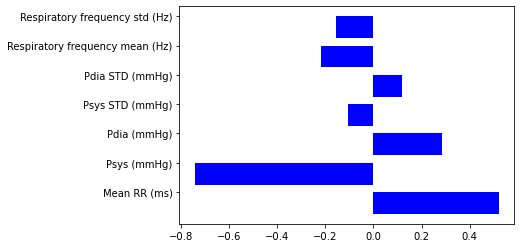

In [70]:
fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(variables))  # the x locations for the groups
ax.barh(ind, (clf.components_[0]), width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(variables, minor=False)

In [71]:
data['PCA2'] = scaler.fit_transform(reduced_data)

### Clustering

In [72]:
reduced_data=data[['PCA1','PCA2']]

reduced_data =reduced_data.values


In [73]:
sns.color_palette("Paired",5)

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6)]

In [74]:
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.colors import ListedColormap
norm = mpl.colors.Normalize(vmin=0, vmax=5)
#cmap = cm.nipy_spectral
cmap = cmap = ListedColormap(sns.color_palette("Paired",5))  
m = cm.ScalarMappable(norm=norm, cmap=cmap)


Silhouette Coefficient: 0.545


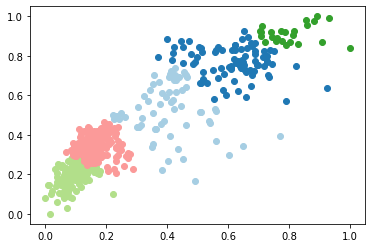

In [75]:
from sklearn.cluster import Birch

# define the model
model = Birch(threshold=0.01, n_clusters=5)
# fit model and predict clusters
yhat = model.fit_predict(reduced_data)
# retrieve unique clusters
clusters = np.unique(yhat)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(reduced_data, model.labels_, metric='sqeuclidean'))

# create scatter plot for samples from each cluster
for cluster in clusters:
    #get distance to the cluster
    #d = model.transform(reduced_data)[:, cluster]
        
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    
    # create scatter of these samples
    plt.scatter(reduced_data[row_ix, 0], reduced_data[row_ix, 1],color=m.to_rgba(cluster))

Silhouette Coefficient: 0.579


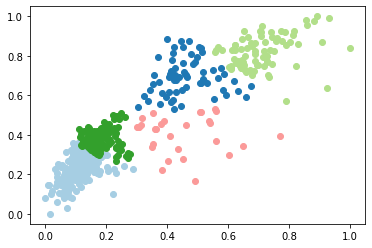

In [76]:
from sklearn.cluster import AgglomerativeClustering

# define the model
model = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat = model.fit_predict(reduced_data)
# retrieve unique clusters
clusters = np.unique(yhat)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(reduced_data, model.labels_, metric='sqeuclidean'))

# create scatter plot for samples from each cluster
for cluster in clusters:
    #get distance to the cluster
    #d = model.transform(reduced_data)[:, cluster]
        
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    
    # create scatter of these samples
    plt.scatter(reduced_data[row_ix, 0], reduced_data[row_ix, 1],color=m.to_rgba(cluster))

Silhouette Coefficient: 0.604


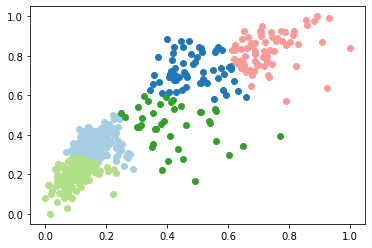

In [77]:
from sklearn.cluster import KMeans

# define the model
model = KMeans(n_clusters=5)
# fit model and predict clusters
yhat = model.fit_predict(reduced_data)
# retrieve unique clusters
clusters = np.unique(yhat)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(reduced_data, model.labels_, metric='sqeuclidean'))

# create scatter plot for samples from each cluster
for cluster in clusters:
    #get distance to the cluster
    #d = model.transform(reduced_data)[:, cluster]
        
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    
    # create scatter of these samples
    plt.scatter(reduced_data[row_ix, 0], reduced_data[row_ix, 1],color=m.to_rgba(cluster))

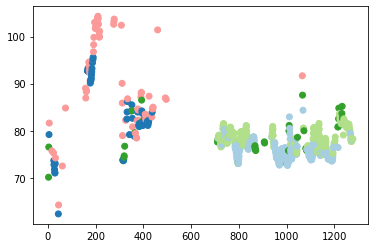

In [78]:
plt.scatter(data['#time']/60, data['Pdia (mmHg)'], c=m.to_rgba(model.labels_.astype(float)))

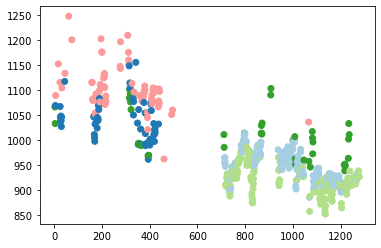

In [79]:
plt.scatter(data['#time']/60, data['Mean RR (ms)'], c=m.to_rgba(model.labels_.astype(float)))

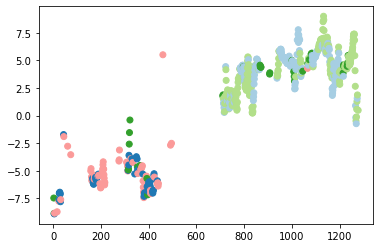

In [80]:
plt.scatter(data['#time']/60, data['Mean ICP (mmHg)'], c=m.to_rgba(model.labels_.astype(float)))

In [81]:
data['cluster']=model.labels_.astype(int)

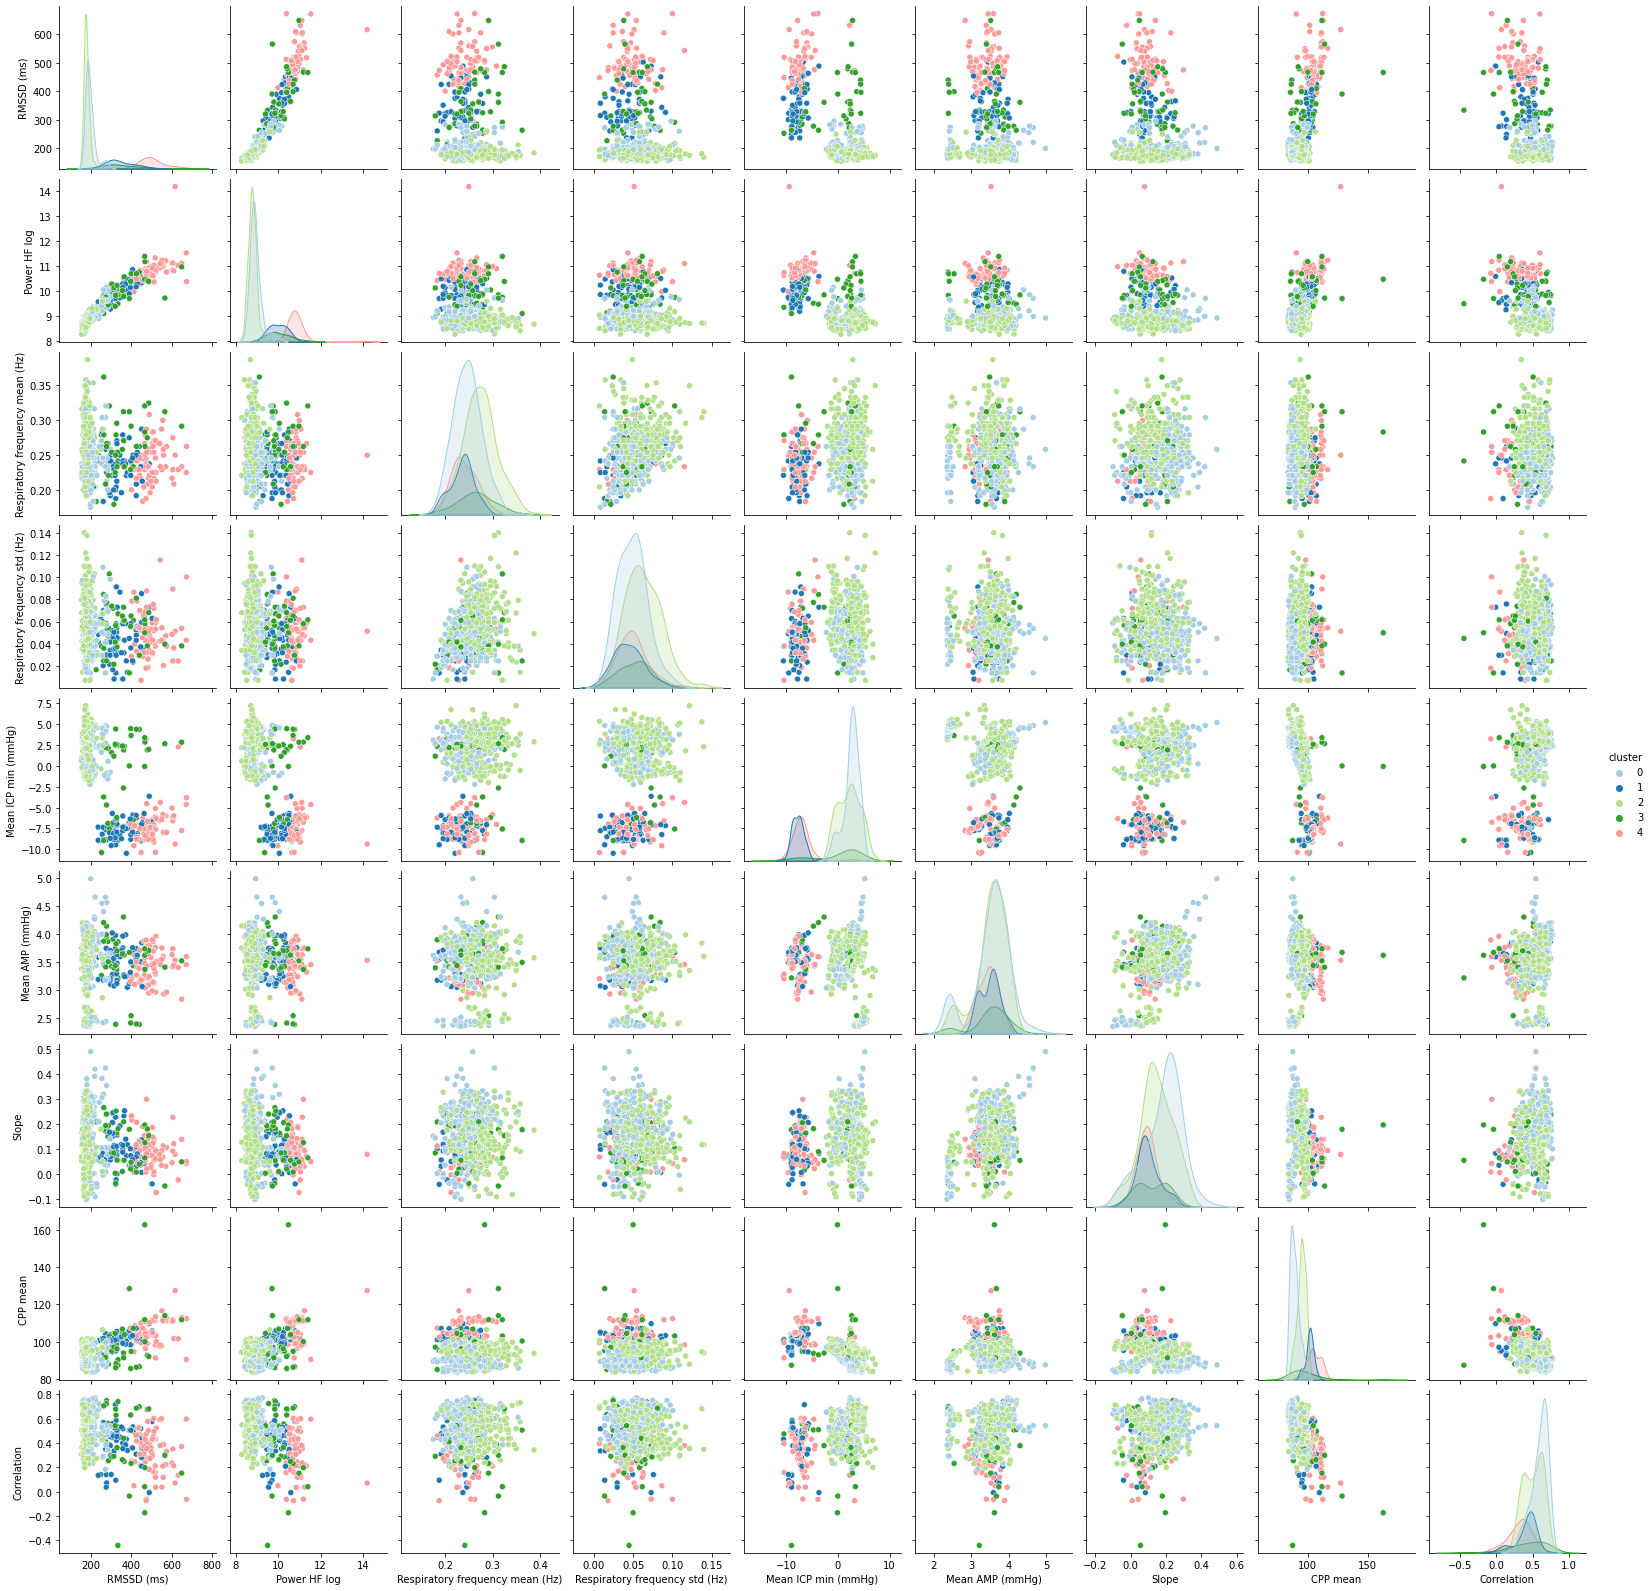

In [82]:
sns.pairplot(data[['RMSSD (ms)', 'Power HF log', 'Respiratory frequency mean (Hz)', 'Respiratory frequency std (Hz)',
       'Mean ICP min (mmHg)', 'Mean AMP (mmHg)','Slope','CPP mean','Correlation','cluster']], hue='cluster', palette=sns.color_palette("Paired",5))